# 영국시장의 중고 자동차 가격 데이터 다루기

## 1️⃣ 데이터 로드 및 기본 확인

In [558]:
# 파이썬 라이브러리 및 모듈 가져오기
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

import warnings
warnings.filterwarnings('ignore')

# 기본 폰트 설정 / 계속된 오류로 코드 변경
# plt.rcParams['font.family'] = 'AppleGothic'  # 기본 폰트 설정 (macOS)
font_path = r"C:\Users\jm\AppData\Local\Microsoft\Windows\Fonts\NanumGothic.ttf"
fm.fontManager.addfont(font_path)                 # 폰트 등록
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rcParams["font.family"] = font_name           # 전체 기본 폰트로 지정
plt.rcParams["axes.unicode_minus"] = False

# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

In [559]:
# Load
car_df = pd.read_csv('cars.csv')
brand_df = pd.read_csv('brand.csv')

In [560]:
display(car_df.head())
display(brand_df.head())
car_df.info()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN


,title,country
0,skoda,Czech Republic
1,vauxhall,United Kingdom
2,hyundai,South Korea
3,mini,United Kingdom
4,ford,United States


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3687 entries, 0 to 3686
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              3687 non-null   object 
 1   Price              3687 non-null   int64  
 2   Mileage(miles)     3687 non-null   int64  
 3   Registration_Year  3687 non-null   int64  
 4   Previous Owners    2276 non-null   float64
 5   Fuel type          3687 non-null   object 
 6   Body type          3687 non-null   object 
 7   Engine             3642 non-null   object 
 8   Gearbox            3687 non-null   object 
 9   Doors              3662 non-null   float64
 10  Seats              3652 non-null   float64
 11  Emission Class     3600 non-null   object 
 12  Service history    540 non-null    object 
dtypes: float64(3), int64(3), object(7)
memory usage: 374.6+ KB


---

### 1-1. 컬럼 확인

**car_df**

| 컬럼                | 의미              |
| ----------------- | --------------- |
| title             | 차량명 (브랜드/모델명) |
| Price             | 차량 판매 가격        |
| Mileage(miles)    | 주행 거리 (마일 단위)  |
| Registration_Year | 최초 등록 연도        |
| Previous Owners   | 이전 소유자 수        |
| Fuel type         | 연료 종류 (Diesel, Petrol, Hybrid 등)  |
| Body type         | 차체 유형 (Hatchback, SUV, Sedan 등)  |
| Engine            | 엔진 배기량/사양 (예: 1.4L)  |
| Gearbox           | 변속기 종류 (Manual / Automatic)  |
| Doors             | 문 개수            |
| Seats             | 좌석 수            |
| Emission Class    | 배출가스 규제 등급 (Euro 5, Euro 6 등)  |
| Service history   | 정비 이력 보유 여부 또는 상태  |

<br>

**brand_df**

| 컬럼      | 의미     |
| ------- | ------ |
| title   | 브랜드명   |
| country | 브랜드 원산 국가 |

---

### 1-2. cars.csv 와 brand.csv 결합

In [561]:
# title 변수 기준으로 브랜드 추출 후 병합
car_df["brand"] = car_df["title"].str.split().str[0].str.strip().str.lower()
brand_df["title"] = brand_df["title"].str.strip().str.lower()

uk_used_cars_df = car_df.merge(brand_df, left_on="brand", right_on="title", how="left")
uk_used_cars_df = uk_used_cars_df.drop(columns=["title_y"]).rename(columns={"title_x": "title"})

uk_used_cars_df

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,brand,country
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN,skoda,Czech Republic
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full,vauxhall,United Kingdom
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN,hyundai,South Korea
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full,mini,United Kingdom
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN,vauxhall,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,RENAULT MEGANE,1395,76202,2006,4.0,Petrol,Hatchback,1.6L,Manual,5.0,5.0,Euro 4,NaN,renault,France
3683,AUDI A4,6990,119000,2012,NaN,Petrol,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN,audi,Germany
3684,BMW 3 SERIES,3995,139000,2013,NaN,Diesel,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN,bmw,Germany
3685,HONDA ACCORD,1390,179190,2007,NaN,Diesel,Estate,2.2L,Manual,5.0,5.0,Euro 4,Full,honda,Japan


---

## 2️⃣ 결측치 확인 및 처리

본 데이터에는 수치형 변수와 범주형 변수 전반에 걸쳐 일부 결측치가 존재하였다.  
결측치 처리 시 단순 제거보다는 변수의 의미와 데이터 분포를 고려한 방식을 적용하였다.

### 2-1. 결측치 확인

In [562]:
# 병합 데이터 결측치 확인
uk_used_cars_df.isnull().sum()

title                   0
Price                   0
Mileage(miles)          0
Registration_Year       0
Previous Owners      1411
Fuel type               0
Body type               0
Engine                 45
Gearbox                 0
Doors                  25
Seats                  35
Emission Class         87
Service history      3147
brand                   0
country                 0
dtype: int64

- 결측치 보유 컬럼 확인

    - `Previous Owners`  
    - `Engine` (범주형)  
    - `Emission Class` (범주형)  
    - `Service history` (범주형)  
    - `Doors`  
    - `Seats`  

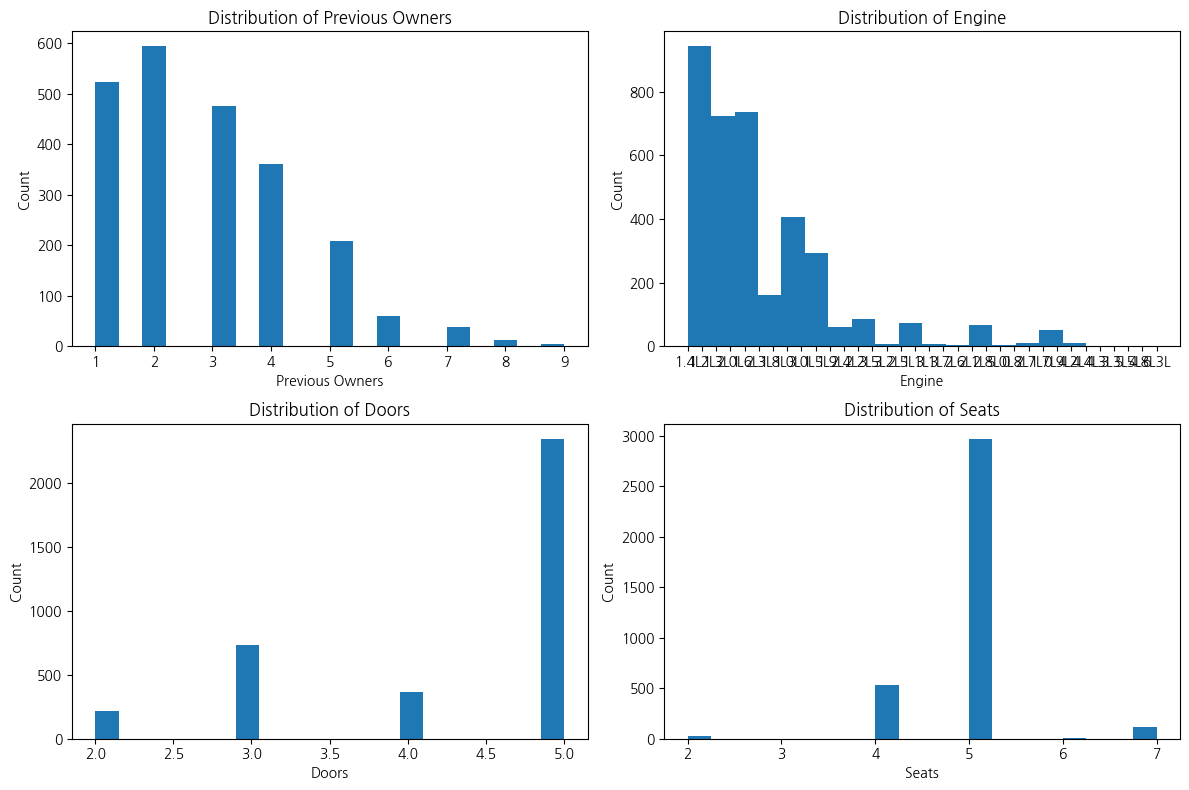

In [563]:
# 수치형 변수 분포 확인 (결측치 제외)
num_cols_with_na = ['Previous Owners', 'Engine', 'Doors', 'Seats']

plt.figure(figsize=(12,8))

for i, col in enumerate(num_cols_with_na, 1):
    plt.subplot(2, 2, i)
    plt.hist(uk_used_cars_df[col].dropna(), bins=20)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

---

### 2-2. <u>`Previous Owners` (수치형 변수 결측치 처리)</u>  
차량 사용 이력과 관련된 변수로, 값이 2~4에 집중되어 있고  
일부 큰 값(이상치)가 존재하는 것을 확인하여 대표값으로 대체하는 것은 부적적하다고 판단  
분포의 중심을 안정적으로 반영하고 이상치에 강건한 중앙값으로 결측치 대체  

- 평균값을 선택하지 않은 이유  
max=9.0는 평균을 끌어 올리는 영향을 미치고,  
극단값은 분산까지 왜곡시킬 수 있으므로,  
분산을 기준으로 하는 PCA에 영향을 주기 떄문에

In [564]:
uk_used_cars_df['Previous Owners'].describe()

count    2276.000000
mean        2.807557
std         1.546028
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         9.000000
Name: Previous Owners, dtype: float64

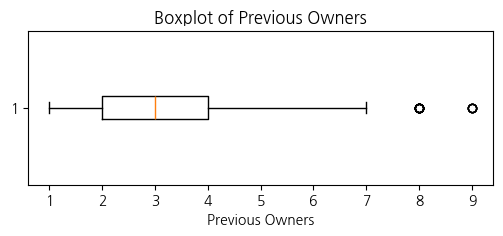

In [565]:
plt.figure(figsize=(6,2))
plt.boxplot(uk_used_cars_df['Previous Owners'].dropna(), vert=False)
plt.xlabel('Previous Owners')
plt.title('Boxplot of Previous Owners')
plt.show()

In [566]:
uk_used_cars_df['Previous Owners'] = (
    uk_used_cars_df['Previous Owners']
    .fillna(uk_used_cars_df['Previous Owners'].median())
)

print(uk_used_cars_df['Previous Owners'].median())
uk_used_cars_df[['Previous Owners']]

3.0


,Previous Owners
0,3.0
1,4.0
2,3.0
3,5.0
4,3.0
...,...
3682,4.0
3683,3.0
3684,3.0
3685,3.0


---

### 2-3. <u>`Service history` (정비 이력) : Full or NaN</u>  

NaN은 정비 이력이 명확하지 않거나 누락된 차는 관리가 안 되었을 가능성이 있음  
→ 가격이나 품질에 부정적 신호  

👉 즉, 결측치 자체가 중요한 정보(signal)이고 값이 Full 또는 Nan으로만 이루어져있으므로  
👉 `Service_missing` 이라는 신규 컬럼을 생성하여 `Service history` 컬럼 대체

In [567]:
# 결측 여부를 먼저 변수로 생성
uk_used_cars_df['Service_missing'] = (
    uk_used_cars_df['Service history'].isnull()
).astype(int)

# 결측치는 의미 있는 값으로 대체
uk_used_cars_df['Service history'] = (
    uk_used_cars_df['Service history'].fillna('No Record')
)

uk_used_cars_df[['Service history', 'Service_missing']].head(10)

,Service history,Service_missing
0,No Record,1
1,Full,0
2,No Record,1
3,Full,0
4,No Record,1
5,No Record,1
6,No Record,1
7,No Record,1
8,No Record,1
9,No Record,1


---

### 2-4. <u>이 외 범주형 / 순서형 변수 결측치 처리<u>
> - Engine  
> - Emission Class  
> - Doors  
> - Seats    

| 변수             | 변수 유형 | 분포 특징          | 결측치 처리 |
| -------------- | ----- | -------------- | ------ |
| Engine         | 연속형   | 이상치 존재, 우측 치우침 | 중앙값    |
| Emission Class | 순서형   | 특정 등급 집중       | 최빈값    |
| Doors          | 이산형   | 5 doors 집중     | 최빈값    |
| Seats          | 이산형   | 5 seats 압도적    | 최빈값    |


- `Engine`  
차량의 배기량을 나타내는 수치형 변수  
값이 1.0 ~ 2.0L 구간에 집중  
3.0L 이상은 소수의 이상치  

👉 평균은 소수의 대배기량 차량에 의해 영향을 받아 대표값으로 사용하기에 적절하지 않다고 판단  
(평균은 3.0 이상의 이상치로 인해 분포의 중심보다 큰 값 쪽으로 이동할 가능성이 있어,  
결측치 대체 시 데이터의 전반적인 특성을 왜곡할 수 있음)  

👉 중앙값을 대표값으로 결측치를 대체하는 것이 적절하다고 판단  

cf. 일반적인 중고차 시장에서 소형 및 준중형 차량이 다수를 차지하고 있음을 반영

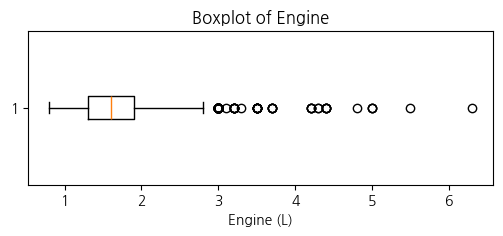

In [568]:
uk_used_cars_df['Engine'] = (
    uk_used_cars_df['Engine']
    .str.replace('L', '', regex=False)
    .astype(float)
)

plt.figure(figsize=(6,2))
plt.boxplot(uk_used_cars_df['Engine'].dropna(), vert=False)
plt.xlabel('Engine (L)')
plt.title('Boxplot of Engine')
plt.show()

In [569]:
# Engine 결측치 중앙값으로 대체
engine_median = uk_used_cars_df['Engine'].median()

uk_used_cars_df['Engine'] = (
    uk_used_cars_df['Engine'].fillna(engine_median)
)

print(engine_median)
uk_used_cars_df[['Engine']]

1.6


,Engine
0,1.4
1,1.2
2,1.4
3,1.4
4,1.3
...,...
3682,1.6
3683,2.0
3684,2.0
3685,2.2


- `Emission Class`
차량의 배출가스 규제를 나타내는 순서형 범주 변수  
값이 Euro 4 ~ 6에 강하게 집중  
극단적 이상치는 없음  

👉 순서형 변수의 경우,  
평균은 실제 존재하지 않는 중간 등급을 생성가능하여 대표값으로 사용하기에 적절하지 않음  

👉 가장 빈도가 높은 등급(최빈값, mode)을 사용하여 결측치 대체

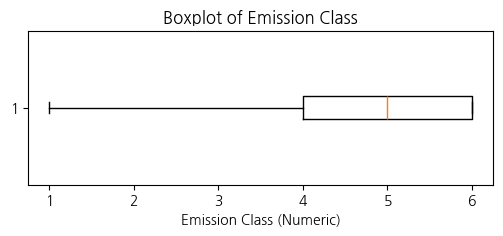

In [570]:
# Euro 등급 숫자 변환
emission_map = {
    'Euro 1': 1,
    'Euro 2': 2,
    'Euro 3': 3,
    'Euro 4': 4,
    'Euro 5': 5,
    'Euro 6': 6
}

uk_used_cars_df['Emission_numeric'] = (
    uk_used_cars_df['Emission Class'].map(emission_map)
)

plt.figure(figsize=(6,2))
plt.boxplot(uk_used_cars_df['Emission_numeric'].dropna(), vert=False)
plt.xlabel('Emission Class (Numeric)')
plt.title('Boxplot of Emission Class')
plt.show()

In [571]:
# Emission Class 결측치 최빈값 대체
emission_mode = uk_used_cars_df['Emission_numeric'].mode()[0]

uk_used_cars_df['Emission_numeric'] = (
    uk_used_cars_df['Emission_numeric'].fillna(emission_mode)
)

print(emission_mode)
uk_used_cars_df[['Emission_numeric']]

5.0


,Emission_numeric
0,6.0
1,4.0
2,5.0
3,4.0
4,5.0
...,...
3682,4.0
3683,5.0
3684,5.0
3685,4.0


- `Doors`  
차량의 문 개수를 나타내는 이산형 수치 변수  
값이 3 ~ 5에 집중  
5 doors가 매우 지배적  
이산형 변수, 의미 있는 값만 존재  

👉 평균/중앙값은 소수점 문제 발생 가능  
(이산형 변수는 평균이나 중앙값을 사용하여 결측치를 대체하면  
실제 존재하지 않는 소수점 값(예: 4.2 doors)이 생성될 수 있어 해석상 부적절할 수 있음)  

👉 결측치를 최빈값으로 대체하는 것이 가장 자연스럽다고 판단  

cf. 5 doors 차량이 가장 높은 빈도로 나타나는 것은  
패밀리카 및 실용성을 중시한 차량이 다수를 차지하고 있음을 반영함

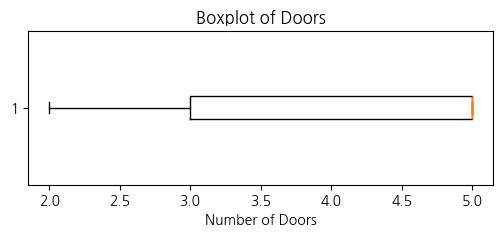

In [572]:
plt.figure(figsize=(6,2))
plt.boxplot(uk_used_cars_df['Doors'].dropna(), vert=False)
plt.xlabel('Number of Doors')
plt.title('Boxplot of Doors')
plt.show()

In [573]:
# Door 결측치 최빈값으로 대체
doors_mode = uk_used_cars_df['Doors'].mode()[0]

uk_used_cars_df['Doors'] = (
    uk_used_cars_df['Doors'].fillna(doors_mode)
)

print(doors_mode)
uk_used_cars_df[['Doors']]

5.0


,Doors
0,5.0
1,3.0
2,5.0
3,3.0
4,5.0
...,...
3682,5.0
3683,4.0
3684,4.0
3685,5.0


- `Seats`  
차량의 좌석 수를 나타내는 이산형 수치 변수  
5 seats가 압도적으로 많음  
2 seats 및 7 seats 차량은 스포츠카나 대형 차량에 해당하는 소수의 사례  
박스플롯상 점으로만 보이는 값들 → 연속형 변수보다는 범주적 성격이 강함을 확인  

👉 평균/중앙값보다 차량 구조를 반영하는 값이 중요  
(평균이나 중앙값을 사용하여 결측치를 대체할 경우,  
실제 존재하지 않는 좌석 수가 생성되거나 차량 구조를 제대로 반영하지 못할 가능성 있음)  

👉 최빈값(5 seats)으로 결측치를 대체하는 것이 가장 합리적  

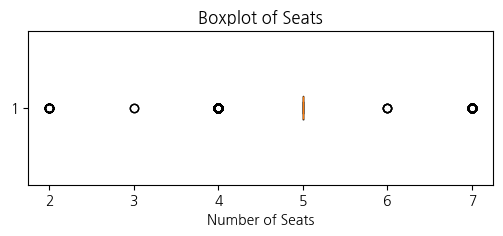

In [574]:
plt.figure(figsize=(6,2))
plt.boxplot(uk_used_cars_df['Seats'].dropna(), vert=False)
plt.xlabel('Number of Seats')
plt.title('Boxplot of Seats')
plt.show()

In [575]:
# Seats 결측치 최빈값 대체
seats_mode = uk_used_cars_df['Seats'].mode()[0]

uk_used_cars_df['Seats'] = (
    uk_used_cars_df['Seats'].fillna(seats_mode)
)

print(seats_mode)
uk_used_cars_df[['Seats']]

5.0


,Seats
0,5.0
1,5.0
2,5.0
3,4.0
4,5.0
...,...
3682,5.0
3683,5.0
3684,5.0
3685,5.0


---

### 2-5. 결측치 처리 완료 확인

In [576]:
# 최종 결측치 확인
uk_used_cars_df.isnull().sum()

title                 0
Price                 0
Mileage(miles)        0
Registration_Year     0
Previous Owners       0
Fuel type             0
Body type             0
Engine                0
Gearbox               0
Doors                 0
Seats                 0
Emission Class       87
Service history       0
brand                 0
country               0
Service_missing       0
Emission_numeric      0
dtype: int64

- 순서형 범주 변수(`Emission Class`)를  
2-4.에서 수치형 변수(`Emission_numeric`)로 변환하여  
결측치를 모두 최빈값으로 대체였으므로 본 출력의 결측치 수치는 넘겨도 괜찮음

---

## 3️⃣ 전처리 (Preprocessing)

- 결측치 처리 (위에서 완료)  
- 타깃/피처 분리  
- 범주형 인코딩  

In [577]:
features = [
    'Mileage(miles)',
    'Registration_Year',
    'Engine',
    'Emission_numeric',
    'Doors',
    'Seats',
    'Previous Owners',
    'Service_missing'
]

X = uk_used_cars_df[features].copy()
y = uk_used_cars_df[target].copy()

In [578]:
# 범주형/수치형 분리
num_cols = X.select_dtypes(include=["int64", "float64"]).columns
cat_cols = X.select_dtypes(include=["object"]).columns

In [579]:
# 중복 컬럼 제거
X = X.loc[:, ~X.columns.duplicated()]

# 수치/범주 분리
num_cols = X.select_dtypes(include=["int64", "float64"]).columns
cat_cols = X.select_dtypes(include=["object"]).columns

X_num = X[num_cols]

# 범주형이 있을 때만 더미 생성
if len(cat_cols) > 0:
    X_cat = X[cat_cols].fillna("Unknown").astype(str)
    X_cat = pd.get_dummies(X_cat, drop_first=False, prefix_sep="__")  # ✅ 안전
    X = pd.concat([X_num, X_cat], axis=1)
else:
    X = X_num.copy()

print("🔹 전처리 전")
print(f"행 수: {uk_used_cars_df.shape[0]}")
print(f"컬럼 수: {uk_used_cars_df.shape[1]}")

print("\n🔹 전처리 후")
print(f"행 수: {X.shape[0]}")
print(f"컬럼 수: {X.shape[1]}")

🔹 전처리 전
행 수: 3687
컬럼 수: 17

🔹 전처리 후
행 수: 3687
컬럼 수: 8


- 결측치를 제거하지 않고, 대체하는 방식으로 진행하여 전처리 전/후의 행/컬럼수가 다르지 않음

---

## 4️⃣ 변수 관계 확인 및 분석용 변수 선별

### 4-1. 수치형 변수 상관관계 확인

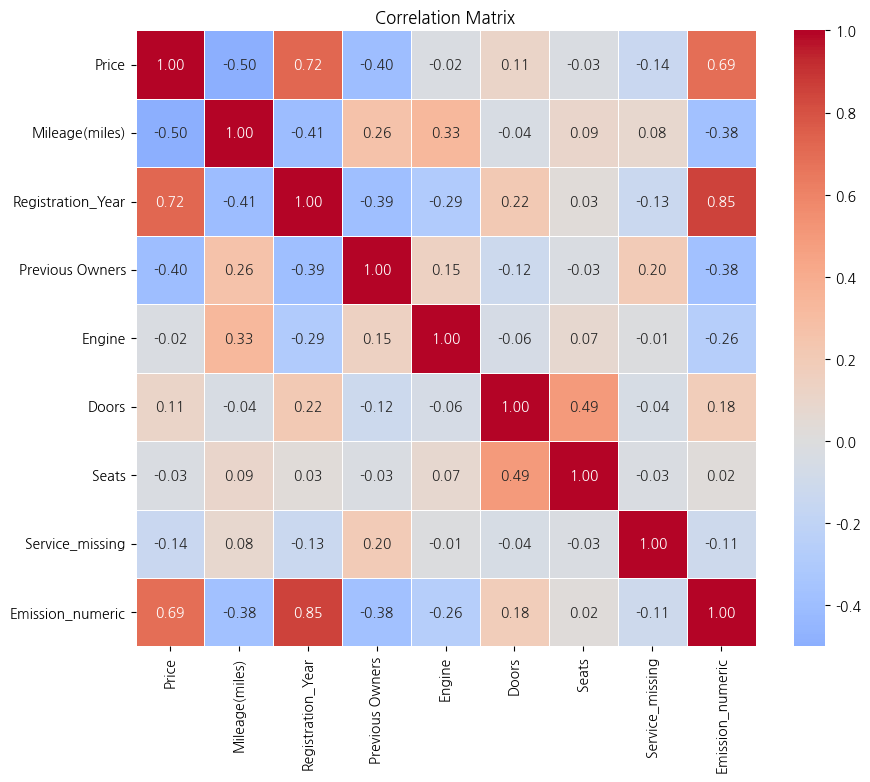

In [580]:
numeric_cols = uk_used_cars_df.select_dtypes(include=['int64','float64']).columns

plt.figure(figsize=(10,8))
sns.heatmap(
    uk_used_cars_df[numeric_cols].corr(),
    cmap="coolwarm",
    center=0,
    annot=True,        # 상관계수 표시
    fmt=".2f",         # 소수점 둘째 자리
    linewidths=0.5     # (선택) 셀 구분선
)
plt.title('Correlation Matrix')
plt.show()

- `Price(가격)`와 가장 강한 관계  
    - `Registration_Year` (등록연도)  
    → 연식이 최근일수록 가격이 높음 (가장 직관적이고 정상적인 결과)  
    - `Emission_numeric` (배출가스 등급 수치화)  
    → 배출 규제가 최신(Euro 6 등)일수록 가격이 높음  
    - `Mileage(miles)`: 중간 음의 상관  
    → 주행거리가 많을수록 가격 하락  
👉 가격은 “연식 + 환경규제 + 주행거리”가 핵심 결정 요인  

<br>

- `Mileage(miles)`의 의미  
    - `Registration_Year`와 음의 상관  
    → 오래된 차일수록 주행거리가 많음 (정상)  
    - `Previous Owners`와 약~중간 양의 상관  
    → 소유자 변경이 잦은 차는 주행거리도 많은 경향  

<br>

- `Previous Owners` (이전 소유자 수)  
    - `Price`와 약한 음의 상관  
    → 소유자가 많을수록 가격은 다소 낮아지는 경향  
    (단, 영향력은 연식·주행거리보다 훨씬 작음)  

<br>

- `Engine` / `Doors` / `Seats`  
    - 전반적으로 약한 상관  
    - `Seats` ↔ `Doors`는 중간 양의 상관  
    → 문이 많은 차일수록 좌석 수도 많음 (차체 크기 효과)  
👉 이 변수들은 보조 변수 성격  

<br>

- `Service_missing`  
    - Price와 약한 음의 상관  
    - Previous Owners와 양의 상관  
👉 정비 이력이 없는 차량은 소유자 변경이 많고 가격이 낮은 경향  


<Big><span style="background-color: #000000;">
📌 중고차 가격은 연식·주행거리·배출가스 등급의 영향을 가장 크게 받으며,  
차량 구조적 요소(문 수, 좌석 수)는 보조적인 역할을 한다.</span></Big>

---

### 4-2. 가격 예측/분석 핵심 변수 선정

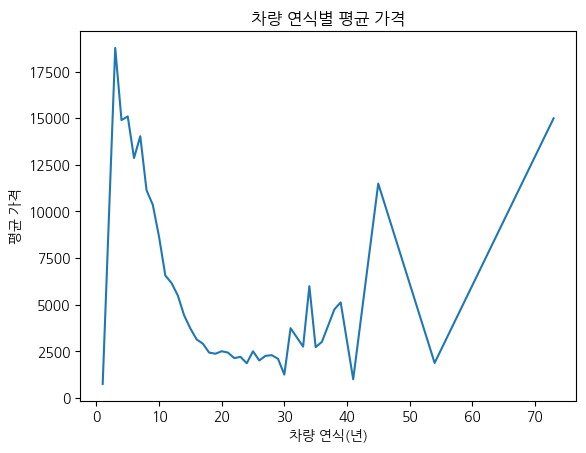

In [581]:
# 차량 연식 계산
CURRENT_YEAR = 2026
uk_used_cars_df["car_age"] = CURRENT_YEAR - uk_used_cars_df["Registration_Year"]

# 연식 vs 평균 가격 시각화
(
    uk_used_cars_df.groupby("car_age")["Price"]
      .mean()
      .plot(kind="line", title="차량 연식별 평균 가격")
)
plt.xlabel("차량 연식(년)")
plt.ylabel("평균 가격")
plt.show()

- 초반(0~3년) 급격한 가격 하락  
- 이후 완만한 감소 → 전형적인 감가 곡선  
- 신차 효과 존재  

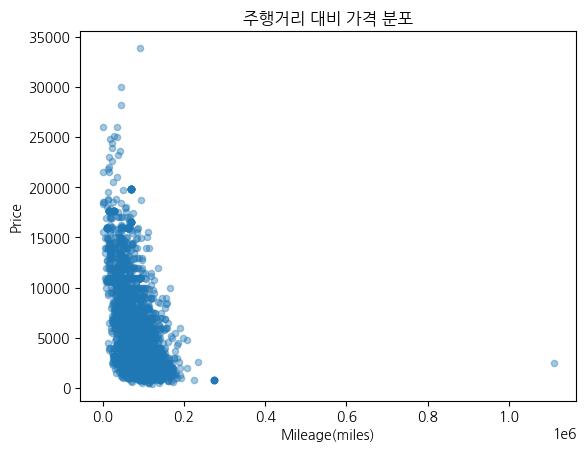

In [582]:
# 주행거리 vs 가격 시각화
uk_used_cars_df.plot.scatter(
    x="Mileage(miles)",
    y="Price",
    alpha=0.4,
    title="주행거리 대비 가격 분포"
)
plt.show()

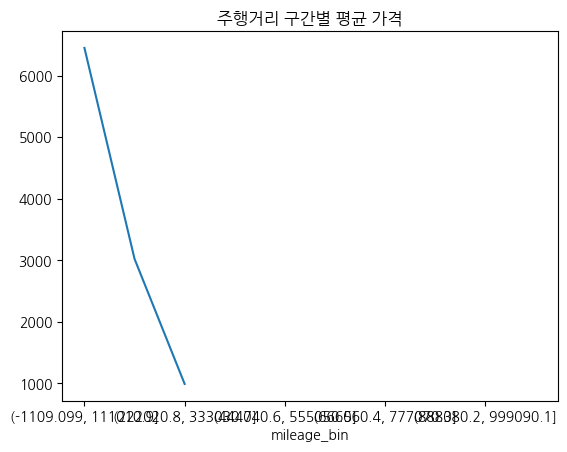

In [583]:
# 구간 평균
uk_used_cars_df["mileage_bin"] = pd.cut(uk_used_cars_df["Mileage(miles)"], bins=10)

(
    uk_used_cars_df.groupby("mileage_bin")["Price"]
      .mean()
      .plot(kind="line", title="주행거리 구간별 평균 가격")
)
plt.show()


- 초반(~ 0.2 mile) 사이에 대부분 분포  
- 주행거리 증가 → 가격 하락 (음의 관계)  
- 동일 연식이라도 주행거리 차이가 가격에 영향  

✅ 핵심 변수  
- `Registration_Year` / `car_age` :	가격과 가장 높은 상관  
- `Mileage(miles)` :	명확한 음의 상관  
- `Emission_numeric` :	최신 차량 프리미엄 반영  
- `Fuel type` :	연료별 수요 차이  
- `brand` / `country` :	브랜드 가치 반영  

✅ 보조 변수  
- `Previous Owners` :	영향 있음, 크진 않음
- `Service history` :	품질 지표로 유용
- `Engine` : 정규화/파싱 필요
- `Gearbox` :	`Manual` vs `Auto` 차이

✅ 제외/주의 변수
- `Doors` / `Seats` : 가격 영향 약함
- `Registration_Year` + `Emission_numeric` : 다중공선성 주의
- `title` :	고유값 과다

---

### 4-3. 목표 설정
<Big><span style="background-color: #000000;">
📌 중고차의 주요 특성(연식, 주행거리 등)을 이용해 차량 가격 하락 패턴을 이해하고,  
가격 예측에 유효한 피처를 선정한다.</span></Big>

In [584]:
target = 'Price'

4-1.에서 중고차 가격과 관련된 여러 수치형 변수들 간의 상관관계를 확인한 결과,  
일부 변수들 사이에서 높은 상관성이 관찰되어 다중공선성 존재함을 확인.  

모델 해석과 안정성에 영향을 줄 수 있으므로,  
<Big><span style="background-color: #000000;">
📌 본 프로젝트에서는 변수 간 중복 정보를 요약하기 위해 PCA를 주요 분석 기법 활용</span></Big>

---

## 5️⃣ 스케일링 (PCA를 위한 필수 전처리)

- PCA는 분산 기반 기법  
- 변수 단위 차이 제거 필수(StandardScaler 적용)

In [585]:
features = [
    'Mileage(miles)', 'Registration_Year', 'Engine',
    'Emission_numeric', 'Doors', 'Seats',
    'Previous Owners', 'Service_missing'
]

X = uk_used_cars_df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled

array([[-0.28264444,  0.81740075, -0.4264055 , ...,  0.17190424,
         0.09753156,  0.41423664],
       [ 0.18411888, -0.75687627, -0.8400222 , ...,  0.17190424,
         0.91853353, -2.41407907],
       [ 1.41255692, -0.16652239, -0.4264055 , ...,  0.17190424,
         0.09753156,  0.41423664],
       ...,
       [ 1.46330309,  0.22704687,  0.8144446 , ...,  0.17190424,
         0.09753156,  0.41423664],
       [ 2.48304749, -0.9536609 ,  1.22806131, ...,  0.17190424,
         0.09753156, -2.41407907],
       [ 0.02109679,  0.22704687, -0.8400222 , ...,  0.17190424,
         3.38153943,  0.41423664]], shape=(3687, 8))

---

## 6️⃣ PCA 분석

- 데이터 분산의 70% 이상을 유지  
- 최소한의 주성분 선택

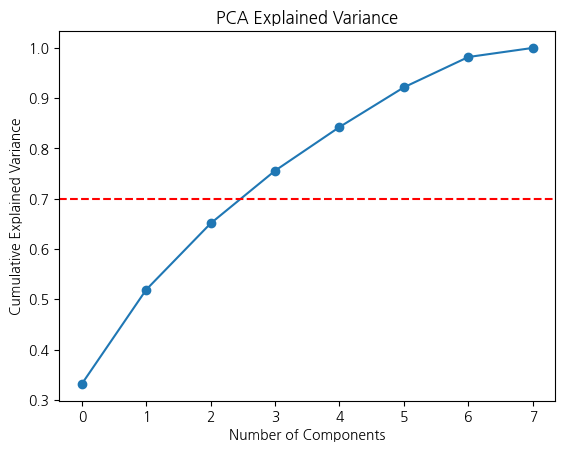

In [586]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca_all = pca.fit_transform(X_scaled)

explained = np.cumsum(pca.explained_variance_ratio_)

plt.plot(explained, marker='o')
plt.axhline(y=0.7, color='r', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.show()

| 주성분 개수 | 누적 분산      |
| :------: | :----------: |
| 1      | ~33%       |
| 2      | ~52%       |
| 3      | ~65%       |
| ✅ **4**  | **~75%** |
| 5      | ~84%       |
| 6      | ~92%       |
| 7      | ~98%       |

In [587]:
n_components = np.argmax(explained >= 0.7) + 1
n_components

np.int64(4)

👉 4개의 주성분만으로 전체 정보의 약 75%를 설명 가능  

<Big><span style="background-color: #000000;">
📌 정보 손실을 최소화하면서도 차원 수를 효과적으로 줄이기 위해 주성분 개수를 4개로 선택</span></Big>

---

## 7️⃣ PCA 결과 해석 (주성분 의미)

In [588]:
# PCA 적용 (Train 기준)
pca = PCA(n_components=4)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

pd.DataFrame(
    pca.components_,
    columns=X.columns,
    index=[f"PC{i+1}" for i in range(4)]
)

,Mileage(miles),Registration_Year,Engine,Emission_numeric,Doors,Seats,Previous Owners,Service_missing
PC1,-0.406072,0.536395,-0.293261,0.523948,0.176727,0.030795,-0.365773,-0.144543
PC2,0.225497,-0.000722,0.194370,-0.015780,0.644203,0.701263,-0.038320,-0.053717
PC3,-0.110550,0.030090,-0.439281,0.037081,0.157993,0.093033,0.339261,0.802381
PC4,0.290413,0.340471,0.659970,0.398051,-0.131242,-0.115532,-0.020399,0.418027


### 🔹PC1 : 차량의 “신형성 / 친환경성” 축

- `Registration_Year` : +0.536
- `Emission_numeric` : +0.524
- `Mileage` : -0.406
- `Previous Owners` : -0.366
- `Engine` : -0.293

    - **해석 : 연식이 최신이고, 배출등급이 높으며, 주행거리가 짧고, 이전 차주 수가 적은 차량**  
    👉 전반적인 차량 상태와 상품성을 나타내는 주성분  
    👉 가격과 가장 직접적으로 연결될 가능성 높음  

### 🔹PC2 : 차량 크기 / 구조적 특성

- `Seats` : +0.701
- `Doors` : +0.644
- `Mileage` : +0.225
- `Engine` : +0.194

    - **해석 : 좌석 수 많음, 문 수 많음, 비교적 큰 차체**    
    👉 패밀리카 / SUV / 실용성 축    
    👉 차량의 크기와 구조적 특성을 반영하는 주성분    

### 🔹PC3 : 관리 이력 / 불확실성

- `Service_missing` : +0.802
- `Engine` : -0.439
- `Previous Owners` : +0.339

    - **해석 : 정비 이력 없음, 엔진 정보 약함, 차주 수 많음**    
    👉 정보 부족 / 관리 이력 불확실성  
    👉 정비 이력 결측 여부가 가장 큰 영향을 미치는 주성분    

### 🔹PC4 : 성능 + 친환경 혼합 요소

- `Engine` : +0.660
- `Service_missing` : +0.418
- `Registration_Year` : +0.340
- `Emission_numeric` : +0.398

    - **해석 : 엔진 성능, 연식 & 배출등급, 일부 정비 이력 요소**    
    👉 기술적 사양 중심 주성분    

<Big><span style="background-color: #000000;">
📌 PCA 분석 결과, 차량 가격에 영향을 미치는 요인들은  
차량의 신형성, 구조적 크기, 관리 이력, 기술적 사양이라는 네 가지 주요 축으로 요약될 수 있었다.  
이를 통해 원래의 다차원 피처를 의미 있는 저차원 공간으로 축소하면서도  
데이터의 핵심 정보를 효과적으로 보존할 수 있었다.</span></Big>

---

## 8️⃣ PCA 결과를 활용한 모델 학습 (Test 기반)

- PCA로 축약된 정보가 실제 예측에 활용 가능한지 검증  
- PCA가 “의미 있는 요약”이었는지 확인

In [ ]:
# 0) feature/target 준비 (컬럼명은 네 df에 맞춰)
features = [
    'Mileage(miles)',
    'Registration_Year',
    'Engine',
    'Emission_numeric',
    'Doors',
    'Seats',
    'Previous Owners',
    'Service_missing'
]
target = 'Price'

X = uk_used_cars_df[features]
y = uk_used_cars_df[target]

# 1) Train/Test 먼저 분리 (PCA 이전!)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 2) 스케일링 (fit: train only)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# 3) PCA (fit: train only, 70% 설명력)
pca = PCA(n_components=0.7, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca  = pca.transform(X_test_scaled)

print("n_components:", pca.n_components_)
print("cum explained:", pca.explained_variance_ratio_.sum())

# 4) 모델 학습 (train PCA만 사용)
model = LinearRegression()
model.fit(X_train_pca, y_train)

# 5) Test 평가
y_pred = model.predict(X_test_pca)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("R2:", r2)

n_components: 4
cum explained: 0.7603605275459691
MAE: 2006.4846046913306
R2: 0.5937524455900189


<Big><span style="background-color: #000000;">
📌 Test 데이터에 대한 평가 결과, PCA 기반 선형 회귀 모델은  
중고차 가격의 전반적인 경향을 일정 수준 설명할 수 있는 것으로 나타났다.  
MAE와 R² 지표를 통해 예측 오차와 모델의 설명력을 함께 확인하였으며,  
이는 PCA를 통해 추출된 주성분들이 가격 결정 요인을 효과적으로 요약하고 있음을 간접적으로 보여준다.</span></Big>

---

# 📌 결론

<Big><span style="background-color: #000000;">
PCA 결과로 도출된 주성분에 따라, 중고차 가격이 단일 변수보다  
여러 특성이 결합된 요인 구조에 의해 결정된다는 것을 확인하였고  
특히 사용 이력과 성능 요소가 가격 하락 패턴을 설명하는 핵심적인 축임을 시사한다.</span></Big>  
